# WetGrass analyzed using PyMC3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm3
import scipy.stats as stats
import pprint as pp

np.random.seed(1234)
# plt.style.use('ggplot')

# plots don't show on notebook unless use this
%matplotlib inline

In [2]:
import os
import sys
cur_dir_path = os.getcwd()
print(cur_dir_path)
os.chdir('../../')
qfog_path = os.getcwd()
print(qfog_path)
sys.path.insert(0,qfog_path)

/home/jupyter/Notebooks/Quantum/quantum-fog/jupyter-notebooks/inference_via_ext_software
/home/jupyter/Notebooks/Quantum/quantum-fog


In [3]:
# enter observed data here
data_Cloudy = np.array([0, 1, 0], dtype=int)

data_Rain = None

data_Sprinkler = None

data_WetGrass = None

In [4]:
# build unfilled model from bif
import importlib
mm = importlib.import_module("jupyter-notebooks.inference_via_ext_software.ModelMaker")
from graphs.BayesNet import *
in_path = "examples_cbnets/WetGrass.bif"
bnet = BayesNet.read_bif(in_path, False)
file_prefix = "examples_cbnets/WetGrass_unfilled"
mm.ModelMaker.write_pymc3_model('mod', file_prefix, bnet,
                             vtx_to_data=None, unfilled=True)

In [5]:
# -i option allows it to access notebook's namespace
%run -i examples_cbnets/WetGrass_unfilled_pymc3.py

In [6]:
# sample model
chain_length = 100 

with mod:      
    start_vals = None
    step = None
    
    # this doesn't work 
    #start_vals = map_vals
    # instantiate sampler
    
    # This doesn't work
    #step = pm3.Metropolis()    

    trace = pm3.sample(chain_length, step=step, start=start_vals)
    print(trace)

Assigned BinaryGibbsMetropolis to Rain
Assigned BinaryGibbsMetropolis to Sprinkler
Assigned BinaryGibbsMetropolis to WetGrass
100%|██████████| 100/100 [00:00<00:00, 1415.09it/s]

<MultiTrace: 1 chains, 100 iterations, 3 variables>


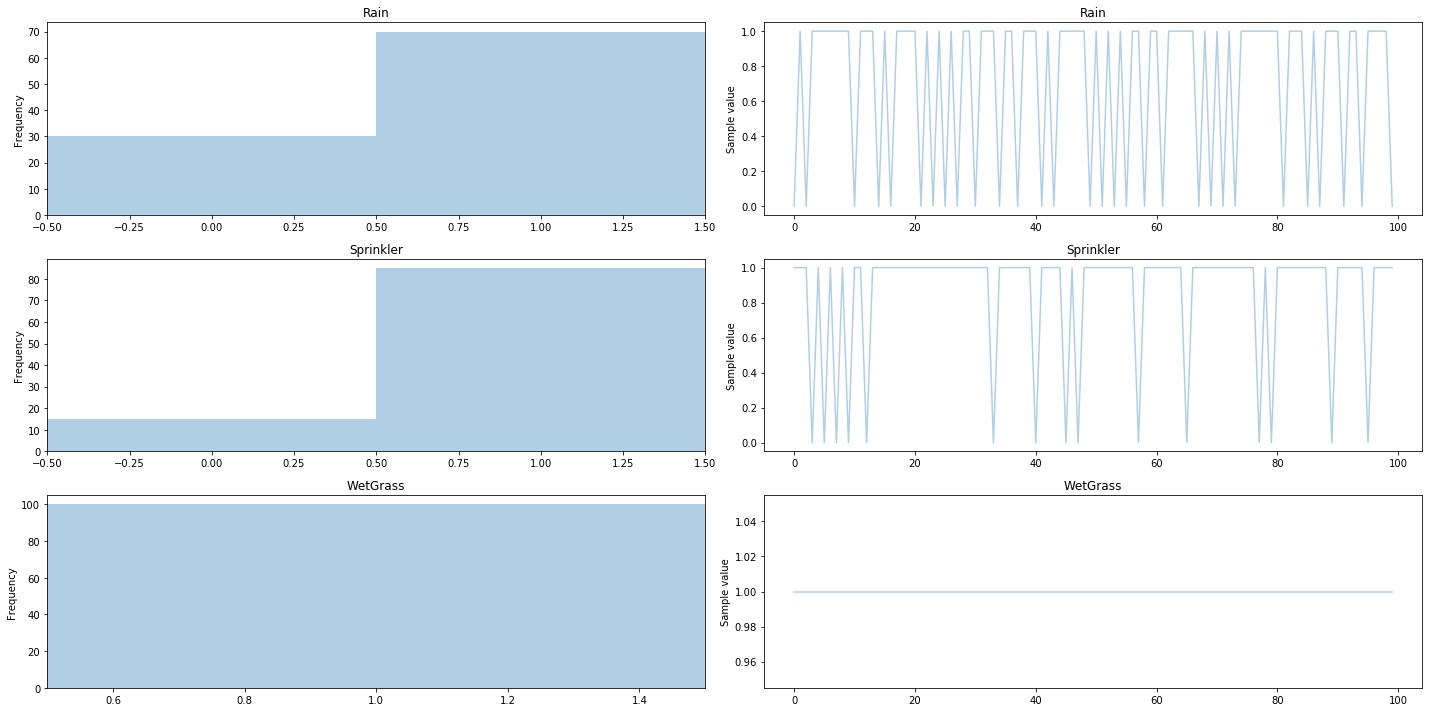

In [7]:
pm3.traceplot(trace,figsize=(20,10));